In [36]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [ ]:
def my_fft(x_n, fs, fftlen=-1, shifted=True, window='rect'):
    if not (window=='rect'): x_n = apply_window(x_n, window)
    if fftlen < len(x_n):  fftlen = len(x_n)
    x_f = np.fft.fft(x_n, fftlen)
    if shifted:
        f = np.arange(-fs/2, fs/2, fs/fftlen)
        x_f = np.fft.fftshift(x_f)
    else:
        f = np.arange(0, fs, fs/fftlen)
    return (f, x_f)

def my_apply_window(x:np.ndarray, window:str)->np.ndarray:
    valid_windows = ['bartlett', 'blackman', 'hamming', 'hanning', 'kaiser']
    if not window in valid_windows:
        print('Warning: {} is not a valid window -> {}'.format(window, valid_windows))
        print('....returning the origonal sequence')
        return x
    return x

wav_file_path = "/home/joey/Recordings/tone_1khz.wav"

In [39]:
fs, data = sp.io.wavfile.read(wav_file_path)
print('Imporing data from {}'.format(wav_file_path))
print('....Sampling Frequency: {}'.format(fs))
print('....Data Shape: {}'.format(data.shape))

Imporing data from /home/joey/Recordings/tone_1khz.wav
....Sampling Frequency: 16000
....Data Shape: (16161,)


In [40]:
N = data.size
w = np.hamming(N)
x = data
xw = x*w
n = np.arange(N)
t = n / fs

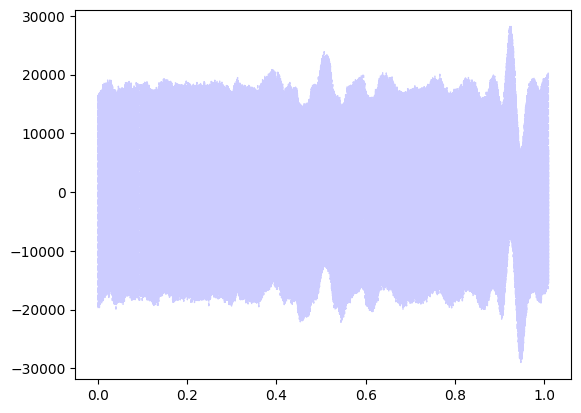

In [41]:
plt.plot(t, x, lw=1, ls='--', c='b', alpha=0.2)

16


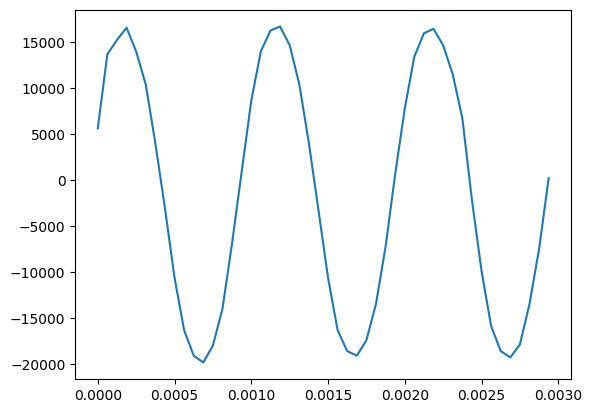

In [42]:
T = 1/1e3
N = int(T*fs)
print(N)
plt.plot(t[0:3*N:1], data[0:3*N:1])

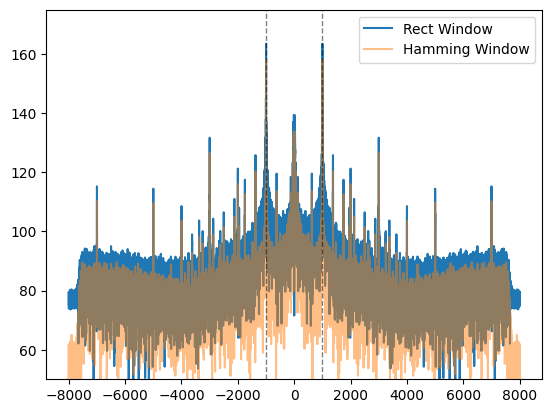

In [53]:
f, x_f = my_fft(x, fs, fftlen=l)
plt.plot(f, 20*np.log10(np.abs(x_f)), label='Rect Window')
f, xw_f = my_fft(xw, fs, fftlen=l)
plt.plot(f, 20*np.log10(np.abs(xw_f)), alpha=0.5, label='Hamming Window')
plt.axvline(1e3, 0, 150, lw=1, ls='--', c='k', alpha = 0.5)
plt.axvline(-1e3, 0, 150, lw=1, ls='--', c='k', alpha = 0.5)
plt.ylim(50, 175)
plt.legend()